# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

<Axes: xlabel='order_value', ylabel='total_items'>

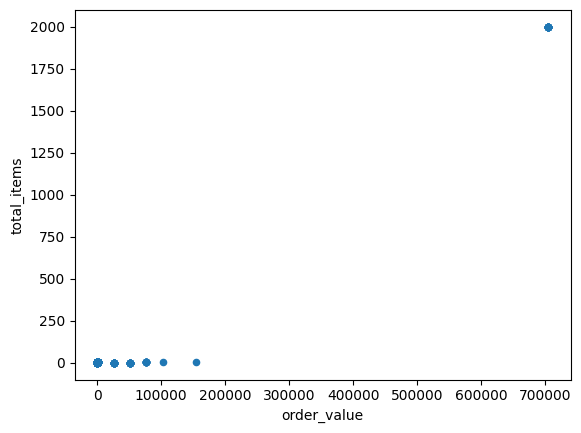

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

df = pd.read_csv("../Statistics Focus/orders.csv")
df.plot.scatter(x='order_value', y = 'total_items')


The main thing that went wrong with this AOV metric is the fact that there are a few instances of somebody buying 2000 items with a total order value of over 700000. When using the mean, these outliars will drastically increase the average value, especially considering the drastic difference in price.


- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

I have one potential metric with a seemingly small change: the median order value, or MOV.

In [285]:
from statistics import median

medianOrderValue = median(df['order_value'])
print(medianOrderValue)


284.0


As you can see, the median order value makes much more sense because when dealing with very large data sets, or when dealing with outliars, the median is much less susceptible to varying wildly.


- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.


([<matplotlib.axis.XTick at 0x7fab67538130>,
 [Text(17226.0, 0, '2017-03-01'),
  Text(17231.0, 0, '2017-03-06'),
  Text(17236.0, 0, '2017-03-11'),
  Text(17241.0, 0, '2017-03-16'),
  Text(17246.0, 0, '2017-03-21'),
  Text(17251.0, 0, '2017-03-26'),
  Text(17256.0, 0, '2017-03-31')])

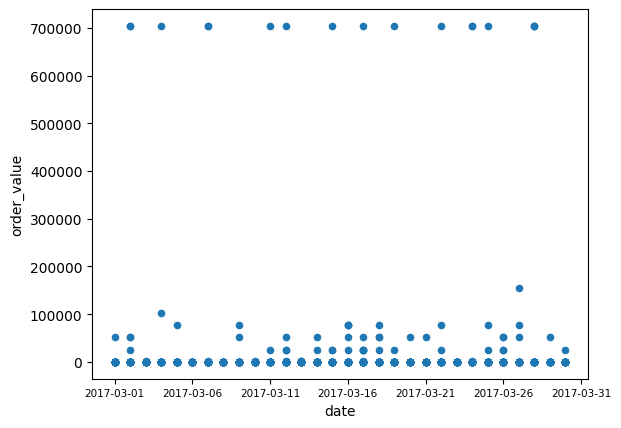

In [286]:
import datetime
dataString = df['created_at']
dates = []

for i in range(len(dataString)):
    yearString = dataString[i]
    year = int(yearString[:4])
    month = int(yearString[5:7])
    day = int(yearString[8:10])
    dates.append(datetime.date(year, month, day))

df['date'] = dates
df.plot.scatter(x='date', y='order_value')
plt.xticks(fontsize=7.5)
plt.xticks([datetime.date(2017, 3, 1), datetime.date(2017, 3, 6), datetime.date(2017, 3, 11), datetime.date(2017, 3, 16), datetime.date(2017, 3, 21), datetime.date(2017, 3, 26), datetime.date(2017, 3, 31)])


A quick look at this scatter plot shows a very interesting trend. There are 12 incredibly high outliars that occur at seemingly random intervals. As expected, customers generally order one or two pairs of shoes as we can see that these points are basically constant throughout the month. There are a few people that spend a decent amount of money every so often, but it generally is fairly tame. There doesn't really seem to be that much of a correlation between day and how many shoes were bought.